# **WEAT ETF Stock Price History**

WEAT ETF şirketi için bize bir veri seti tanımlanmış. Bu veri üzerinde çeşitli analizler yaparak ve görselleştirmeler ile birlikte, WEAT ETF şirketinin hisse senedi tarihini analiz edeceğiz. Sonrasında ise projemizde zaman serisi kullanarak gelecek zamanlarda hisse senedi için tahminlerde bulunacağız.

## **Veri Setinin İncelenmesi ve Temel İstatistikler**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import datetime as datetime
from statsmodels.tsa.seasonal import seasonal_decompose


Burada bize verilen veri setini içeri aktarma işlemini yapıyoruz. Bu aşamada Pandas kütüpahnesini kullanıyoruz.

In [ ]:
data = pd.read_csv("path/WEAT ETF Stock Price History.csv")
data.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,12/29/2023,5.97,5.99,5.998,5.92,584.92K,-0.50%
1,12/28/2023,6.00,5.94,6.030,5.94,634.94K,1.18%
2,12/27/2023,5.93,5.97,5.990,5.91,764.65K,-1.66%
3,12/26/2023,6.03,5.86,6.060,5.83,1.06M,2.90%
4,12/22/2023,5.86,5.85,5.899,5.85,606.12K,0.17%


Veri seti şu sütunlara sahip:

- Date: İşlem tarihi
- Price: Gün sonu kapanış fiyatı
- Open: Gün başı açılış fiyatı
- High: Gün içindeki en yüksek fiyat
- Low: Gün içindeki en düşük fiyat
- Vol.: O gün gerçekleşen işlem hacmi
- Change %: Bir önceki kapanış fiyatına göre yüzdesel değişim


Öncelikle bize verilen veri seti için veri türlerini kontrol edelim.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2528 entries, 0 to 2527
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      2528 non-null   object 
 1   Price     2528 non-null   float64
 2   Open      2528 non-null   float64
 3   High      2528 non-null   float64
 4   Low       2528 non-null   float64
 5   Vol.      2503 non-null   object 
 6   Change %  2528 non-null   object 
dtypes: float64(4), object(3)
memory usage: 138.4+ KB


Verimizde bulunan **Date** sütunundaki verilerimiz "object" olarak gelmekte. Bizim için bu verinin "date" formatında olması gerekmektedir.

In [ ]:
data['Date'] = pd.to_datetime(data['Date'])
data.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,2023-12-29,5.97,5.99,5.998,5.92,584.92K,-0.50%
1,2023-12-28,6.00,5.94,6.030,5.94,634.94K,1.18%
2,2023-12-27,5.93,5.97,5.990,5.91,764.65K,-1.66%
3,2023-12-26,6.03,5.86,6.060,5.83,1.06M,2.90%
4,2023-12-22,5.86,5.85,5.899,5.85,606.12K,0.17%


Verimizde bulunan hisselerin günlük değişim oranlarını incelememiz ve temel istatistik uygulayabilmemiz için **Change** sütununu yüzdesel değerden sayısal değere dönüştürmemiz gerekmektedir.

In [ ]:
data['Change %'] = data['Change %'].str.rstrip('%').astype('float') / 100.0
data.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,2023-12-29,5.97,5.99,5.998,5.92,584.92K,-0.0050
1,2023-12-28,6.00,5.94,6.030,5.94,634.94K,0.0118
2,2023-12-27,5.93,5.97,5.990,5.91,764.65K,-0.0166
3,2023-12-26,6.03,5.86,6.060,5.83,1.06M,0.0290
4,2023-12-22,5.86,5.85,5.899,5.85,606.12K,0.0017


In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Price,2528.0,7.845369,2.561897,4.8600,6.0300,6.9800,9.01250,17.4700
Open,2528.0,7.851388,2.568559,4.8800,6.0475,6.9700,9.02250,17.4300
High,2528.0,7.926894,2.602286,4.9600,6.0800,7.0500,9.10000,17.5500
Low,2528.0,7.764583,2.522623,4.8300,5.9900,6.9100,8.92025,17.1800
Change %,2528.0,-0.000187,0.017293,-0.0953,-0.0107,-0.0013,0.00920,0.1561


Veri setimizi temel istatistiki bilgiler ile incelediğimizde aşağıdaki sonuçları çıkartabiliriz.

- Verimizin temel olarak istatiklerini incelediğimiz zaman, **ortalama** fiyatların 7.84-7.85 arasında değiştiğini görebiliriz.
- **Standart sapmalarında** ise veri 2.52-2.60 arasında olduğunu görüyoruz. Buradan anladığımız üzere fiyatların ortalama etrafında yayıldığını söyleyebiliriz.
- **Minimum** ve **maksimum** değerlere baktığımızda ise 4.83 ve 17.55 arasında olduğunu söyleyebiliriz. Buradan da hisse senetlerinde bazı dönemlerde fiyat dalgalanması olacağını anlayabiliriz.
- **Ortalama değişim yüzdesi** neredeyse sıfıra yakın  % -0.0187, bu da gün içindeki fiyat değişikliklerinin genelde çok küçük olduğunu bize göstermektedir.
- **Minimum** ve **maksimum** değişim yüzdeleri -%9.53 ve +%15.61, bu da bazı olağanüstü günlerde önemli fiyat değişiklikleri yaşandığını gösteriyor.



In [ ]:
data.tail(10)

,Date,Price,Open,High,Low,Vol.,Change %
2518,2014-02-04,14.26,13.97,14.27,13.75,21.65K,0.0532
2519,2014-02-03,13.54,13.54,13.74,13.50,26.12K,0.0030
2520,2014-01-31,13.50,13.34,13.59,13.31,8.81K,0.0060
2521,2014-01-30,13.42,13.45,13.51,13.40,10.77K,0.0015
2522,2014-01-29,13.40,13.62,13.63,13.40,12.08K,-0.0247
2523,2014-01-28,13.74,14.01,14.01,13.70,6.46K,-0.0079
2524,2014-01-27,13.85,14.19,14.19,13.63,32.25K,-0.0086
2525,2014-01-24,13.97,14.03,14.03,13.80,48.43K,-0.0092
2526,2014-01-23,14.10,14.68,14.68,14.02,26.31K,0.0137
2527,2014-01-22,13.91,13.95,13.96,13.81,2.04K,-0.0014



## **Veri Setinin Görselleştirilmesi**

Şimdi veri setini görselleştirerek trend, mevsimsellik ve potansiyel aykırı değerleri gözlemleyeceğiz. Bu aşamada, fiyatların zaman içindeki hareketini incelemek için bir zaman serisi grafiği çizeceğiz. Trendi ve mevsimselliği tespit etmek için zaman serisi ayrıştırma yöntemlerinden biri olan "seasonal_decompose" fonksiyonunu kullanabiliriz. Bu fonksiyon, orijinal zaman serisini trend, mevsimsellik ve kalıntı bileşenlerine ayırır.

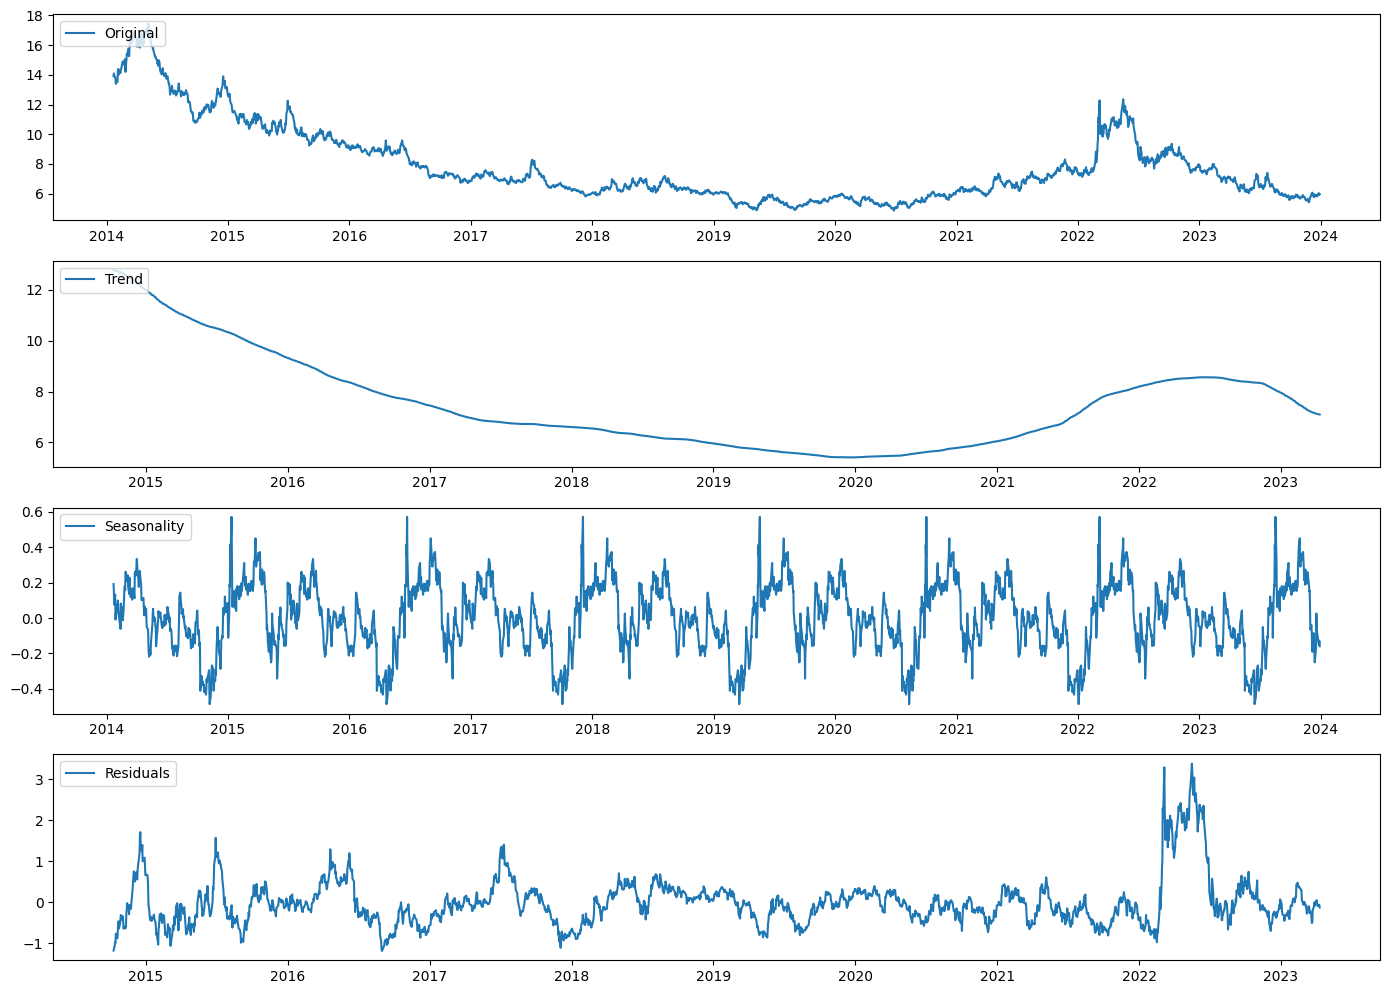

In [ ]:
data.set_index('Date', inplace=True)
price_series = data['Price']

decomposition = seasonal_decompose(price_series, model='additive', period=365)

plt.figure(figsize=(14, 10))

plt.subplot(411)
plt.plot(price_series, label='Original')
plt.legend(loc='upper left')

plt.subplot(412)
plt.plot(decomposition.trend, label='Trend')
plt.legend(loc='upper left')

plt.subplot(413)
plt.plot(decomposition.seasonal, label='Seasonality')
plt.legend(loc='upper left')

plt.subplot(414)
plt.plot(decomposition.resid, label='Residuals')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()


1. **Orjinal**: WEAT ETF'nin günlük kapanış fiyatlarının zaman serisi grafiği. Burada, fiyatın zaman içinde nasıl değiştiğini görebiliriz.

2. **Trend**: Zaman serisinden elde edilen uzun vadeli eğilimi gösterir. Bu, veri setindeki genel yönü veya eğilimi yansıtır ve burada belirli bir dönem boyunca genel fiyat artışı veya azalışı gibi eğilimleri görebiliriz.

3. **Mevsimsellik**: Zaman serisindeki mevsimsel dalgalanmaları gösterir. Bu analiz, WEAT ETF fiyatlarında belirgin bir mevsimsellik olup olmadığını belirlememize yardımcı olur. Ancak, finansal zaman serilerinde mevsimsellik her zaman açıkça tanımlanamayabilir ve bu grafiğin yorumlanması daha karmaşık olabilir.

4. **Diğer**: Orjinal veri serisinden trend ve mevsimsellik çıkarıldıktan sonra kalan bileşenlerden oluşturulmuştur. Bu, modelimiz tarafından açıklanamayan rastgele dalgalanmaları veya veri setindeki potansiyel aykırı değerleri içerir.

## **Prophet Modeli İle Zaman Serisi Analizi**

In [ ]:
pip install fbprophet

In [ ]:
from prophet import Prophet
from sklearn.metrics import mean_absolute_error, mean_squared_error

DEBUG:cmdstanpy:input tempfile: /tmp/tmp_cnb1fgq/8qng6gfy.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_cnb1fgq/vf_3r7wi.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=26755', 'data', 'file=/tmp/tmp_cnb1fgq/8qng6gfy.json', 'init=/tmp/tmp_cnb1fgq/vf_3r7wi.json', 'output', 'file=/tmp/tmp_cnb1fgq/prophet_modelik20cvar/prophet_model-20240303013811.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
01:38:11 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
01:38:12 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


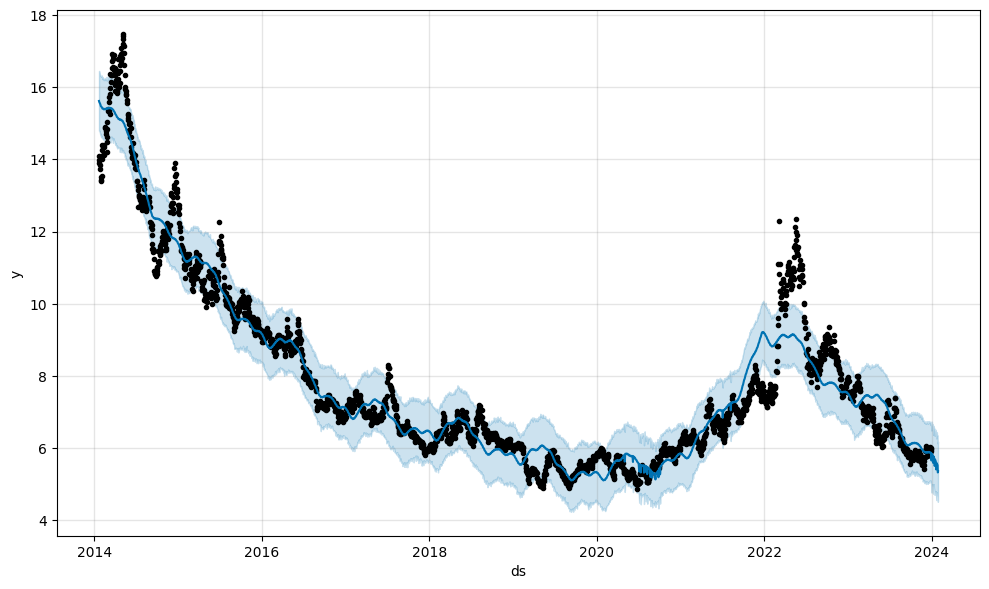

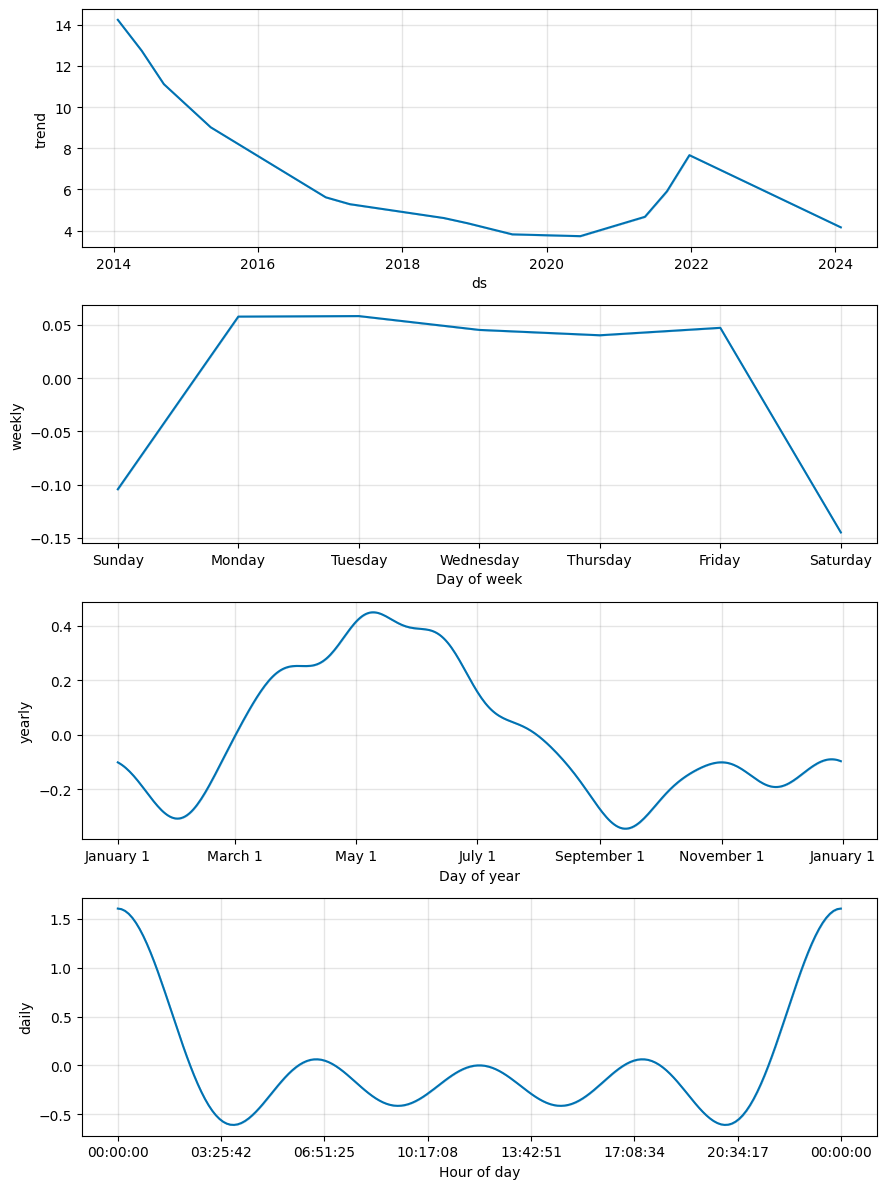

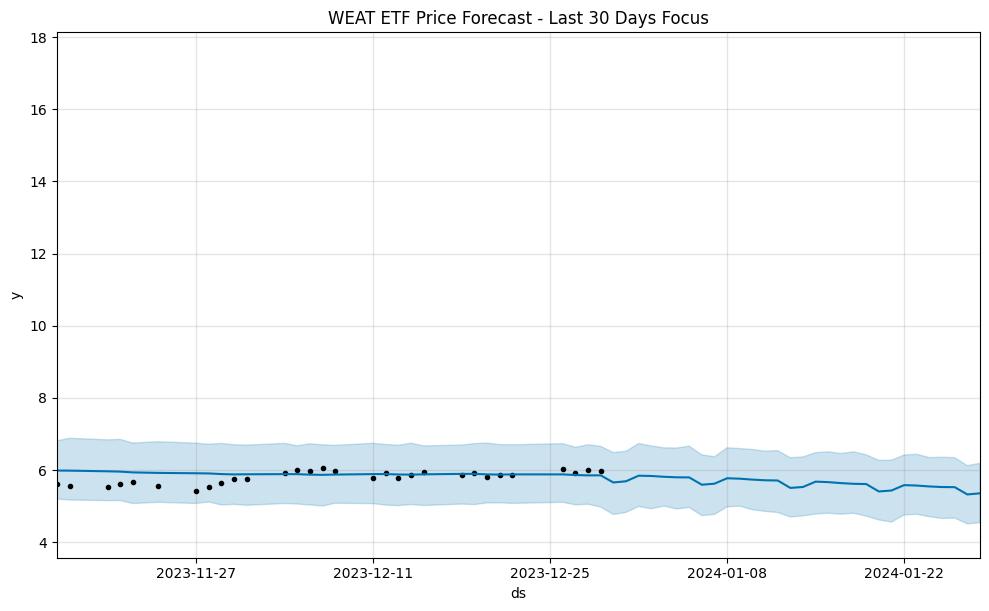

MAE: 8.70943300026667
RMSE: 8.72260836187042


In [ ]:
prophet_df = data.reset_index()[['Date', 'Price']].rename(columns={'Date': 'ds', 'Price': 'y'})
model = Prophet(daily_seasonality=True)
model.fit(prophet_df)

-future = model.make_future_dataframe(periods=30)
forecast = model.predict(future)

model.plot(forecast)
plt.show()
model.plot_components(forecast)
plt.show()

fig = model.plot(forecast)
ax = fig.gca()
ax.set_xlim([forecast['ds'].iloc[-60], forecast['ds'].iloc[-1]])
plt.title('WEAT ETF Price Forecast - Last 30 Days Focus')
plt.show()

test_df = prophet_df[-30:]
predictions = forecast[-30:]['yhat']

mae = mean_absolute_error(test_df['y'], predictions)
rmse = np.sqrt(mean_squared_error(test_df['y'], predictions))
print(f'MAE: {mae}')
print(f'RMSE: {rmse}')

Model çıktımızı değerlendirirken, Meta'nın Prophet modelini kullanarak veri setimizdeki zaman serisi verilerini analiz ettik. Bu analiz, ilerleyen dönemlerde verimizin hangi eğilimi göstereceğine dair bize önemli bilgiler sunacak.

- **Grafik Üzerindeki Gösterimler:**
  - **Siyah Noktalar:** Gerçek verilerimizi temsil eder ve modelimizin tahminlerinin doğruluğunu değerlendirmemize yardımcı olur.
  - **Mavi Çizgi:** Modelimizin tahminlerini gösterir, bu tahminler gelecekteki eğilimler hakkında fikir verir.
  - **Mavi Gölge:** Modelin hata payını, yani tahminlerin güven aralığını ifade eder. Bu, tahminlerin ne kadar kesin olduğunu anlamamıza yardımcı olur.

Analizimiz, incelenen hissenin sonraki 30 gün boyunca bir düşüş trendi izleyebileceğini öngörüyor. Bu tahmin, geçmiş yılların aynı dönemlerindeki verilerle karşılaştırılarak elde edilmiştir. Hissenin düşüş trendinde olması, geçmişte aynı dönemlerde yaşanan düşüşler ve hissenin genel düşüş eğiliminden kaynaklanıyor olabilir.

**Performans Metrikleri:**
- **MAE (Ortalama Mutlak Hata):** 8.709, modelin tahmin hatalarının ortalama mutlak değeridir. Bu değer, modelin tahminlerinin gerçek değerlerden ne kadar sapma gösterdiğinin bir göstergesidir.
- **RMSE (Kök Ortalama Kare Hata):** 8.723, tahmin hatalarının karelerinin ortalama kökünü ifade eder ve büyük hatalara daha fazla ağırlık verir. Bu, modelin büyük hatalar karşısındaki hassasiyetini ölçer.

"Price" sütununun temel istatistikleri aşağıdaki gibidir:

- Ortalama (Mean): 7.85 yaklaşık
- Standart Sapma (Std): 2.56
- Minimum (Min): 4.86
- Maksimum (Max): 17.47

Bu istatistikler göz önünde bulundurulduğunda, RMSE değeri 8.72 ve MAE değeri 8.71 olarak hesaplanmıştır. Bu değerler, veri setindeki "Price" sütununun ortalama değerine yakın ve maksimum değerin yarısından biraz fazla bir seviyededir.

Bu metrikler, modelimizin tahminlerinin gerçek değerlere ne kadar yakın olduğunu gösterir ve performansını değerlendirmede kritik öneme sahiptir.

Eğer modelin performansı beklenen seviyenin altındaysa, modelin iyileştirilmesi için çeşitli stratejiler uygulanabilir.

Bunlar arasında veri ön işleme adımlarının iyileştirilmesi, daha detaylı özellik mühendisliği, model parametrelerinin optimizasyonu ve alternatif modelleme tekniklerinin denenmesi yer alır.

Ayrıca, modelin zaman içinde güncellenmesi ve yeni verilerle eğitilmesi önem taşır. Bu süreç, modelimizin güncelliğini korumasını ve tahminlerinin doğruluğunu artırmasını sağlar.